In [26]:
import numpy as np
from collections import deque

import random

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

from models import *

import matplotlib.pyplot as plt

In [11]:
!ls

PhD in Traffic Management - Assignment copy.ipynb
PhD in Traffic Management - Assignment.ipynb
Test.ipynb
__pycache__
control_helpers.py
files_e3
helpers.py
logs
models.py
network.png
train_baselineReduction.py
train_deepQ.py
train_reinforce.py


In [19]:
a = deque([0,1,2], maxlen=6)
a.extend([3,4,5,6,7])
a

deque([2, 3, 4, 5, 6, 7])

In [29]:
Q = torch.tensor([[0.8, 0.4, 0.55]])
action = torch.argmax(Q, dim=-1)
action.item()

0

In [22]:
class ReplayBuffer():
    """Replay Buffer stores the last N transitions"""
    def __init__(self, max_size=30000, batch_size=64):
        """
        args:
            max_size: the maximal number of stored transitions
            batch_size: the number of transitions returned 
                in a minibatch
        """
        self.max_size = max_size
        self.batch_size = batch_size
        self.states = deque([], maxlen=max_size)
        self.actions = deque([], maxlen=max_size)
        self.next_states = deque([], maxlen=max_size)
        self.rewards = deque([], maxlen=max_size)
        self.is_dones = deque([], maxlen=max_size)
        self.indices = [None]*batch_size
        
    def add_experience(self, states, actions, next_states, rewards, is_dones):
        self.states.extend(states)
        self.actions.extend(actions)
        self.next_states.extend(next_states)
        self.rewards.extend(rewards)
        self.is_dones.extend(is_dones)
        
    
    def get_valid_indices(self):
        experience_size = len(self.states)
        for i in range(self.batch_size):
            index = random.randint(0, experience_size-1)
            self.indices[i] = index
            
    def get_minibatch(self):
        """
        Return a minibatch
        """
        batch = []
        self.get_valid_indices()
        
        for idx in self.indices:
            state = self.states[idx]
            action = self.actions[idx]
            next_state = self.next_states[idx]
            reward = self.rewards[idx]
            is_done = self.is_dones[idx]
            
            batch.append((state, action, next_state, reward, is_done))
            
        return batch

In [37]:
random.randint(0,18)

5

In [38]:
is_dones = [False]*5
is_dones

[False, False, False, False, False]

In [39]:
is_dones[-1] = True
is_dones

[False, False, False, False, True]

In [42]:
import struct
def binary(num):
    s = ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))
    return [int(a) for a in s]

In [40]:
a = np.array(binary(18.9))
a = a.reshape((8,4))

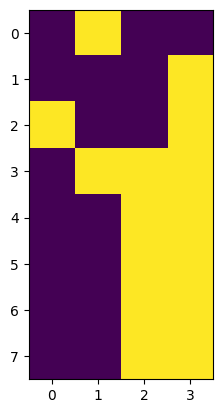

In [41]:
plt.imshow(a)